In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

### Sütunlar ve Anlamları:
Yıl (Yil): Verilerin ait olduğu yıl (2012).
İl Kodu (Il Kodu): İlin tanımlandığı kod.
İl (il): İlin adı.
İlçe Kodu (ilce_kodu): İlçenin tanımlandığı kod.
İlçe Adı (ilce_adi): İlçenin adı.
Ürün Adı (urun_adi): Ürünün türü ve üretim şekli (örneğin, Buğday (Durum) Kuru).
Ekilen Alan (dekar): Ekilen alanın büyüklüğü (dekar cinsinden).
Hasat Edilen Alan (dekar): Hasat edilen alanın büyüklüğü (dekar cinsinden).
Üretim Miktarı (ton) (Uretim Miktari (ton)): Üretim miktarı (ton cinsinden).
Verim (Kg/Dekar): Bir dekar başına elde edilen verim (kg cinsinden).
Rakım (m) (Rakim (m)): Üretim alanının deniz seviyesinden yüksekliği (metre cinsinden).
Ortalama Sıcaklık (°C) (Ortalama Sicaklik (°C)): Üretim alanının ortalama sıcaklığı (Celsius cinsinden).
Nem Oranı (%) (Nem Orani (%)): Üretim alanının ortalama nem oranı (yüzde cinsinden).
Yağış Oranı (mm) (Yagis Orani (mm)): Üretim alanının yıllık yağış miktarı (milimetre cinsinden).
Güneş Işığı (saat/gün) (Gunes Isigi (saat/gun)): Üretim alanının günlük ortalama güneş ışığı süresi (saat cinsinden).

### Veri Setinin Genel Özellikleri:
Yıl: Tüm veriler 2012 yılına ait.
İl ve İlçe: Veriler, Türkiye'nin farklı illerinden ve bu illere bağlı çeşitli ilçelerden toplanmış.
Ürün Türü ve Üretim Şekli: Buğday (Durum ve Diğer) üretiminin kuru ve sulu tarım yöntemleriyle yapılmış olması.
Tarım Alanları: Ekilen ve hasat edilen alanların büyüklükleri değişkenlik göstermekte.
Üretim Verimliliği: Dekar başına alınan ürün miktarı (verim) farklılık göstermekte.
Çevresel Faktörler: Rakım, sıcaklık, nem, yağış ve güneş ışığı gibi çevresel faktörler her il ve ilçeye göre farklılık göstermekte.

In [44]:
df =  pd.read_excel('bugday.xlsx')
df.head()

,Yıl,İl Kodu,il,ilce_kodu,ilce_adi,urun_adi,Ekilen Alan(dekar),Hasat Edilen Alan(dekar),Üretim Miktari(ton),Verim (Kg/Dekar),Rakım (m),Ortalama Sıcaklık (°C),Nem Oranı (%),Yağış Oranı (mm),Güneş Işığı (saat/gün)
0,2012,1,ADANA,1,SEYHAN,Buğday (Durum) Kuru,NaN,NaN,NaN,300,28,18.7,66,625.0,9.0
1,2012,1,ADANA,1,SEYHAN,Buğday (Durum) Sulu,NaN,NaN,NaN,500,28,18.7,66,625.0,9.0
2,2012,1,ADANA,1,SEYHAN,Buğday (Diğer) Kuru,0.0,0.0,0.0,300,28,18.7,66,625.0,9.0
3,2012,1,ADANA,1,SEYHAN,Buğday (Diğer) Sulu,10000.0,10000.0,5000.0,500,28,18.7,66,625.0,9.0
4,2012,1,ADANA,2,YÜREĞİR,Buğday (Durum) Kuru,NaN,NaN,NaN,324,28,18.7,66,625.0,9.0


In [51]:
def replace_turkish_characters(text):
    replacements = {
        'ş': 's', 'Ş': 'S', 'ı': 'i', 'İ': 'I', 'ç': 'c', 'Ç': 'C', 
        'ü': 'u', 'Ü': 'U', 'ö': 'o', 'Ö': 'O', 'ğ': 'g', 'Ğ': 'G'
    }
    for turkish_char, non_turkish_char in replacements.items():
        text = text.replace(turkish_char, non_turkish_char)
    return text


df.columns = [replace_turkish_characters(col) for col in df.columns]


df = df.applymap(lambda x: replace_turkish_characters(x) if isinstance(x, str) else x)

df.head()

C:\Users\yucel\AppData\Local\Temp\ipykernel_8108\2590174735.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: replace_turkish_characters(x) if isinstance(x, str) else x)


,Yil,Il Kodu,il,ilce_kodu,ilce_adi,urun_adi,Ekilen Alan(dekar),Hasat Edilen Alan(dekar),Uretim Miktari(ton),Verim (Kg/Dekar),Rakim (m),Ortalama Sicaklik (°C),Nem Orani (%),Yagis Orani (mm),Gunes Isigi (saat/gun)
0,2012,1,ADANA,1,SEYHAN,Bugday (Durum) Kuru,32723.335072,32688.793133,NaN,300,28,18.7,66,625.0,9.0
1,2012,1,ADANA,1,SEYHAN,Bugday (Durum) Sulu,32723.335072,32688.793133,NaN,500,28,18.7,66,625.0,9.0
2,2012,1,ADANA,1,SEYHAN,Bugday (Diger) Kuru,0.000000,0.000000,0.0,300,28,18.7,66,625.0,9.0
3,2012,1,ADANA,1,SEYHAN,Bugday (Diger) Sulu,10000.000000,10000.000000,5000.0,500,28,18.7,66,625.0,9.0
4,2012,1,ADANA,2,YUREGIR,Bugday (Durum) Kuru,32723.335072,32688.793133,NaN,324,28,18.7,66,625.0,9.0


### 1. İl ve İlçelere Göre Üretim Verimliliği Analizi
Aşağıdaki grafikte, 2012 yılında Türkiye'de en yüksek ortalama verime sahip ilk 20 ilçe gösterilmiştir. Her bir bar, ilgili ilçenin ortalama verimini (kg/dekar) temsil etmektedir.

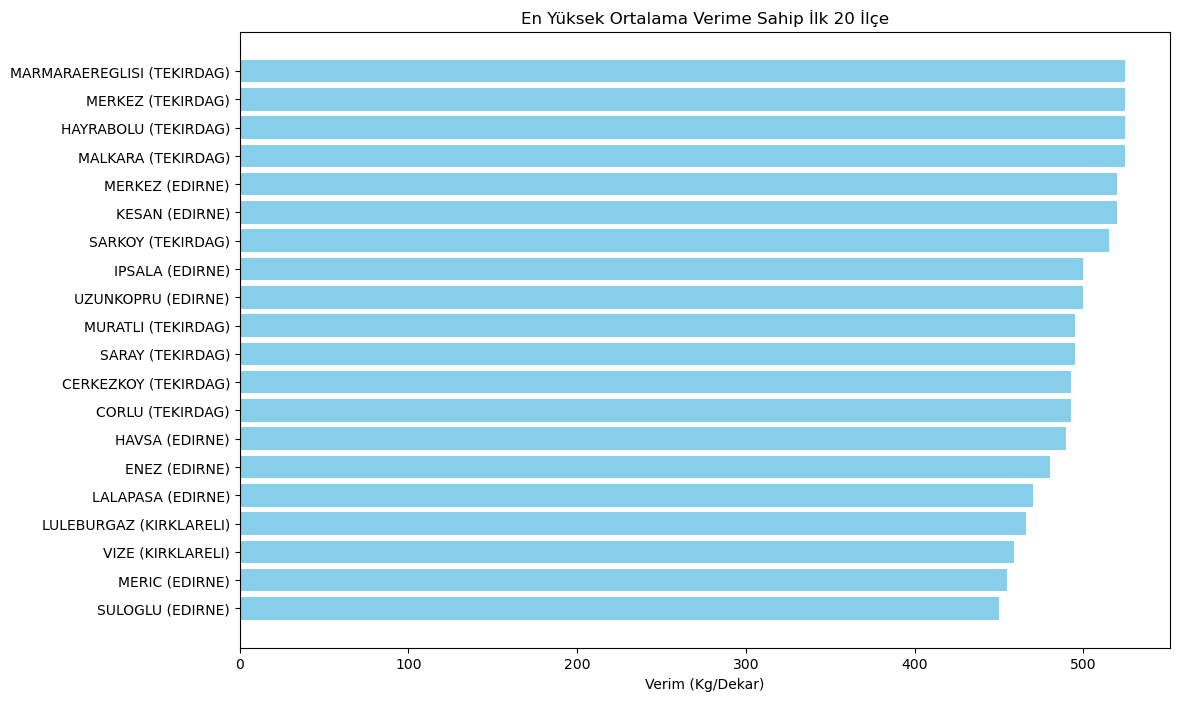

In [34]:
# İl ve İlçelere Göre Ortalama Verim (Kg/Dekar) Hesaplama
avg_yield_per_district = df.groupby(['il', 'ilce_adi'])['Verim (Kg/Dekar)'].mean().reset_index()
avg_yield_per_district = avg_yield_per_district.sort_values(by='Verim (Kg/Dekar)', ascending=False)

# İlk 20 ilçeyi seçelim görselleştirme için
top_20_districts = avg_yield_per_district.head(20)

# Bar grafiği ile görselleştirme
plt.figure(figsize=(12, 8))
plt.barh(top_20_districts['ilce_adi'] + " (" + top_20_districts['il'] + ")", top_20_districts['Verim (Kg/Dekar)'], color='skyblue')
plt.xlabel('Verim (Kg/Dekar)')
plt.title('En Yüksek Ortalama Verime Sahip İlk 20 İlçe')
plt.gca().invert_yaxis()  # En yüksek verim en üstte olacak şekilde sıralama
plt.show()

### 2. Ürün Türüne Göre Karşılaştırma
Grafikte, 2012 yılında Türkiye'de farklı buğday türleri ve üretim yöntemleri için ortalama verimlilik değerleri dört ana kategoriye göre gösterilmiştir. Her bir bar, ilgili ürün türü ve üretim şeklinin ortalama verimini (kg/dekar) temsil etmektedir:

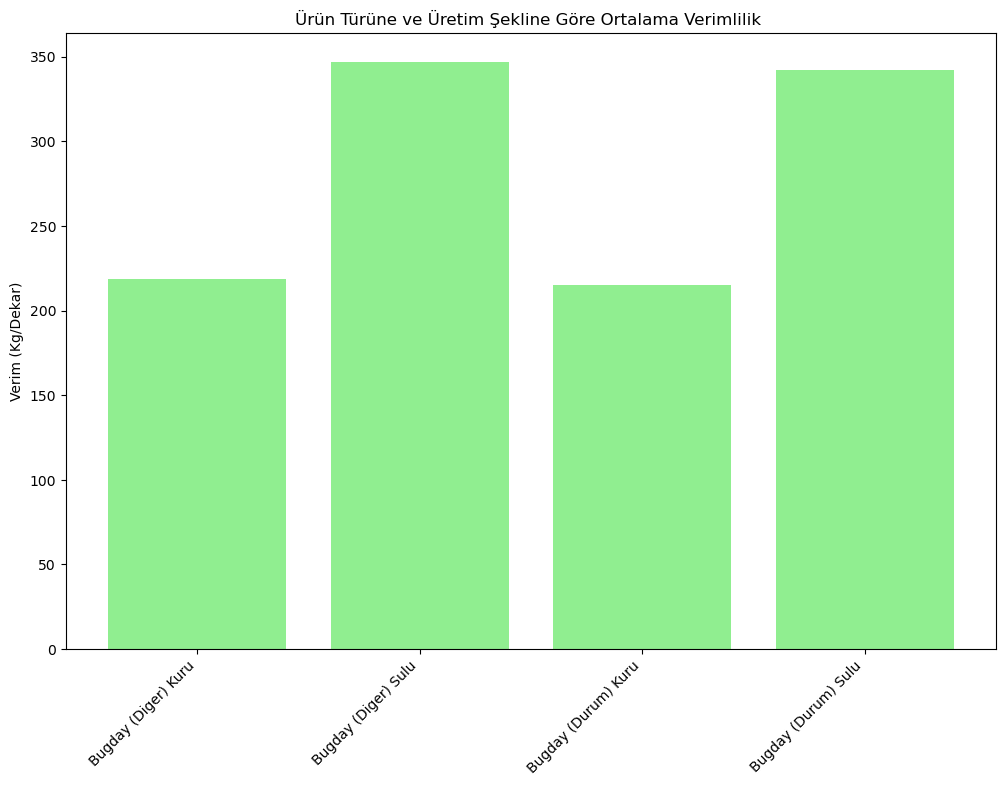

In [35]:
# Ürün türlerinin yazım farklarını düzeltecek şekilde verileri güncelleyelim
df['urun_adi'] = df['urun_adi'].replace({
    'Bugday (Durum) kuru': 'Bugday (Durum) Kuru',
    'Bugday (Durum) sulu': 'Bugday (Durum) Sulu',
    'Bugday (Diger) sulu': 'Bugday (Diger) Sulu'
})

# Ürün Türüne ve Üretim Şekline Göre Ortalama Verimlilik Hesaplama (düzeltme sonrası)
avg_yield_per_product_corrected = df.groupby('urun_adi')['Verim (Kg/Dekar)'].mean().reset_index()

# Bar grafiği ile görselleştirme (dört ürün türü olacak şekilde)
plt.figure(figsize=(12, 8))
plt.bar(avg_yield_per_product_corrected['urun_adi'], avg_yield_per_product_corrected['Verim (Kg/Dekar)'], color='lightgreen')
plt.ylabel('Verim (Kg/Dekar)')
plt.title('Ürün Türüne ve Üretim Şekline Göre Ortalama Verimlilik ')
plt.xticks(rotation=45, ha='right')
plt.show()



### 3. Çevresel Faktörlerin Etkisi
Aşağıdaki dört scatter plot (dağılım grafiği), çevresel faktörlerin (ortalama sıcaklık, nem oranı, yağış oranı ve güneş ışığı) buğday verimliliği üzerindeki etkilerini göstermektedir. Her bir nokta, bir il veya ilçedeki verimlilik değerini ve ilgili çevresel faktörü temsil eder.

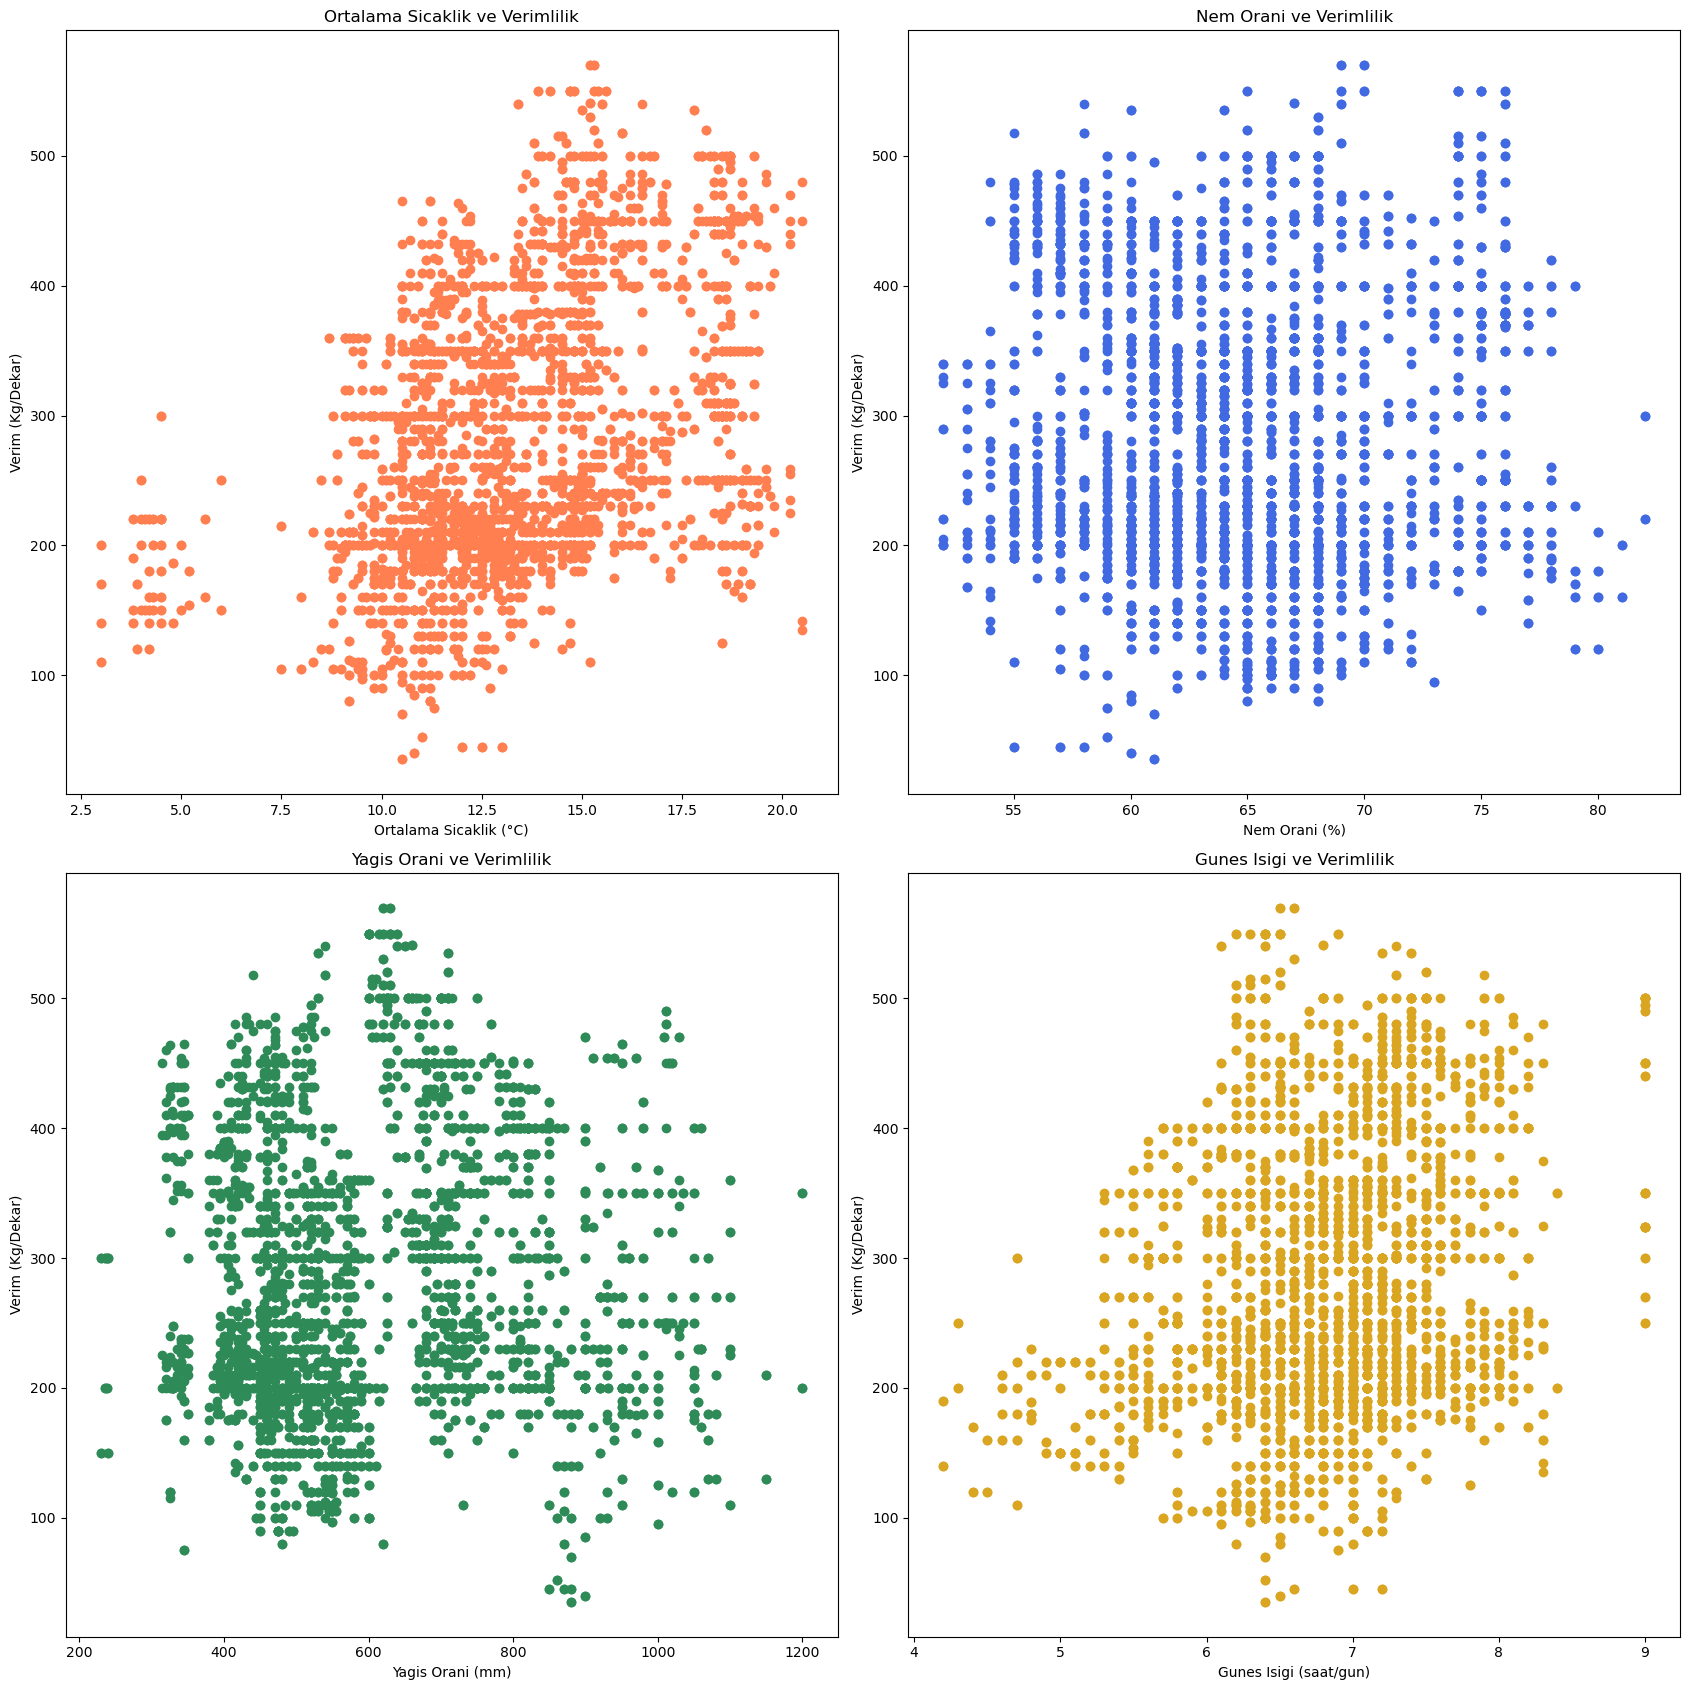

In [36]:
# Çevresel faktörler ve verimlilik arasındaki ilişkiyi görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(17, 17))

# Ortalama Sıcaklık (°C) ve Verimlilik
axes[0, 0].scatter(df['Ortalama Sicaklik (°C)'], df['Verim (Kg/Dekar)'], color='coral')
axes[0, 0].set_xlabel('Ortalama Sicaklik (°C)')
axes[0, 0].set_ylabel('Verim (Kg/Dekar)')
axes[0, 0].set_title('Ortalama Sicaklik ve Verimlilik')

# Nem Oranı (%) ve Verimlilik
axes[0, 1].scatter(df['Nem Orani (%)'], df['Verim (Kg/Dekar)'], color='royalblue')
axes[0, 1].set_xlabel('Nem Orani (%)')
axes[0, 1].set_ylabel('Verim (Kg/Dekar)')
axes[0, 1].set_title('Nem Orani ve Verimlilik')

# Yağış Oranı (mm) ve Verimlilik
axes[1, 0].scatter(df['Yagis Orani (mm)'], df['Verim (Kg/Dekar)'], color='seagreen')
axes[1, 0].set_xlabel('Yagis Orani (mm)')
axes[1, 0].set_ylabel('Verim (Kg/Dekar)')
axes[1, 0].set_title('Yagis Orani ve Verimlilik')

# Güneş Işığı (saat/gün) ve Verimlilik
axes[1, 1].scatter(df['Gunes Isigi (saat/gun)'], df['Verim (Kg/Dekar)'], color='goldenrod')
axes[1, 1].set_xlabel('Gunes Isigi (saat/gun)')
axes[1, 1].set_ylabel('Verim (Kg/Dekar)')
axes[1, 1].set_title('Gunes Isigi ve Verimlilik')

plt.tight_layout()
plt.show()


### 5. Üretim Miktarlarının Dağılımı
Yukarıdaki grafikte, 2012 yılında Türkiye'de en yüksek toplam üretim miktarına sahip ilk 20 ilçe gösterilmiştir. Her bir bar, ilgili ilçenin toplam buğday üretim miktarını (ton cinsinden) temsil etmektedir.

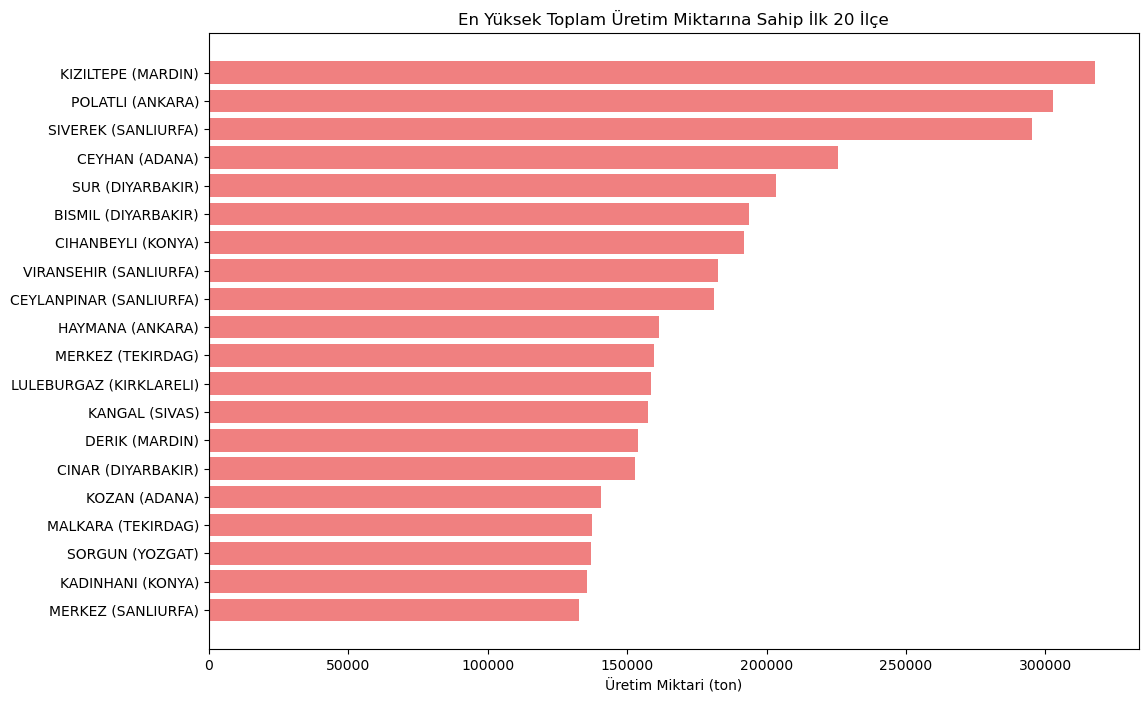

In [37]:
# İl ve İlçelere Göre Toplam Üretim Miktarı (ton) Hesaplama
total_production_per_district = df.groupby(['il', 'ilce_adi'])['Uretim Miktari(ton)'].sum().reset_index()
total_production_per_district = total_production_per_district.sort_values(by='Uretim Miktari(ton)', ascending=False)

# İlk 20 ilçeyi seçelim görselleştirme için
top_20_production_districts = total_production_per_district.head(20)

# Bar grafiği ile görselleştirme
plt.figure(figsize=(12, 8))
plt.barh(top_20_production_districts['ilce_adi'] + " (" + top_20_production_districts['il'] + ")", top_20_production_districts['Uretim Miktari(ton)'], color='lightcoral')
plt.xlabel('Üretim Miktari (ton)')
plt.title('En Yüksek Toplam Üretim Miktarına Sahip İlk 20 İlçe')
plt.gca().invert_yaxis()  # En yüksek üretim miktarı en üstte olacak şekilde sıralama
plt.show()

## Model

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Yıl                       3413 non-null   int64  
 1   İl Kodu                   3413 non-null   int64  
 2   il                        3413 non-null   object 
 3   ilce_kodu                 3413 non-null   int64  
 4   ilce_adi                  3413 non-null   object 
 5   urun_adi                  3413 non-null   object 
 6   Ekilen Alan(dekar)        2301 non-null   float64
 7   Hasat Edilen Alan(dekar)  2301 non-null   float64
 8   Üretim Miktari(ton)       2301 non-null   float64
 9   Verim (Kg/Dekar)          3413 non-null   int64  
 10  Rakım (m)                 3413 non-null   int64  
 11  Ortalama Sıcaklık (°C)    3413 non-null   float64
 12  Nem Oranı (%)             3413 non-null   int64  
 13  Yağış Oranı (mm)          3413 non-null   float64
 14  Güneş Iş

In [47]:
df.describe()

,Yıl,İl Kodu,ilce_kodu,Ekilen Alan(dekar),Hasat Edilen Alan(dekar),Üretim Miktari(ton),Verim (Kg/Dekar),Rakım (m),Ortalama Sıcaklık (°C),Nem Oranı (%),Yağış Oranı (mm),Güneş Işığı (saat/gün)
count,3413.0,3413.000000,3413.000000,2301.000000,2301.000000,2301.000000,3413.000000,3413.000000,3413.000000,3413.000000,3413.000000,3413.000000
mean,2012.0,35.908585,7.135658,32723.335072,32688.793133,8735.332464,280.492529,754.099619,13.375535,65.085555,618.985350,6.799619
std,0.0,21.713561,6.320944,66781.818980,66763.297578,19300.941017,105.608491,553.271545,3.112582,5.737544,180.248378,0.735853
min,2012.0,1.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,3.000000,52.000000,230.000000,4.200000
25%,2012.0,18.000000,3.000000,1079.000000,1079.000000,294.000000,200.000000,125.000000,11.200000,61.000000,475.000000,6.400000
50%,2012.0,35.000000,6.000000,8537.000000,8537.000000,2122.000000,250.000000,830.000000,13.200000,65.000000,570.000000,6.800000
75%,2012.0,54.000000,10.000000,34500.000000,34500.000000,7990.000000,352.000000,1155.000000,15.200000,68.000000,730.000000,7.300000
max,2012.0,81.000000,39.000000,1000000.000000,1000000.000000,260000.000000,570.000000,2450.000000,20.500000,82.000000,1200.000000,9.000000


In [48]:
# Eksik veya anormal değerleri kontrol edelim
missing_values = df.isnull().sum()
df.isnull().sum()

Yıl                            0
İl Kodu                        0
il                             0
ilce_kodu                      0
ilce_adi                       0
urun_adi                       0
Ekilen Alan(dekar)          1112
Hasat Edilen Alan(dekar)    1112
Üretim Miktari(ton)         1112
Verim (Kg/Dekar)               0
Rakım (m)                      0
Ortalama Sıcaklık (°C)         0
Nem Oranı (%)                  0
Yağış Oranı (mm)               0
Güneş Işığı (saat/gün)         0
dtype: int64

In [49]:
# Eksik değerlerin özet tablosunu oluşturalım
missing_values_summary = pd.DataFrame(missing_values, columns=['Eksik Değer Sayısı'])
missing_values_summary = missing_values_summary[missing_values_summary['Eksik Değer Sayısı'] > 0]

In [53]:
# Eksik değerleri ortalama ile dolduralım
df['Ekilen Alan(dekar)'] = df['Ekilen Alan(dekar)'].fillna(df['Ekilen Alan(dekar)'].mean())
df['Hasat Edilen Alan(dekar)'] = df['Hasat Edilen Alan(dekar)'].fillna(df['Hasat Edilen Alan(dekar)'].mean())
df['Uretim Miktari(ton)'] = df['Uretim Miktari(ton)'].fillna(df['Uretim Miktari(ton)'].mean())

# Eksik değerlerin tekrar kontrolü
missing_values_after = df.isnull().sum()
df.isnull().sum()

Yil                         0
Il Kodu                     0
il                          0
ilce_kodu                   0
ilce_adi                    0
urun_adi                    0
Ekilen Alan(dekar)          0
Hasat Edilen Alan(dekar)    0
Uretim Miktari(ton)         0
Verim (Kg/Dekar)            0
Rakim (m)                   0
Ortalama Sicaklik (°C)      0
Nem Orani (%)               0
Yagis Orani (mm)            0
Gunes Isigi (saat/gun)      0
dtype: int64

### One-Hot Encoding kullanarak kategorik verileri kodlayalım. 

Kategorik verileri One-Hot Encoding yöntemi ile sayısal değerlere dönüştürdük. Artık her kategorik değişkenin kendi sütunları var ve bunlar binary (0 veya 1) değerlerle temsil ediliyor.

0: BUĞDAY (DIĞER) KURU
1: BUĞDAY (DIĞER) SULU
2: BUĞDAY (DURUM) KURU
3: BUĞDAY (DURUM) SULU

In [58]:
# Convert all text to uppercase to unify the entries and then reassign category codes
df['urun_adi'] = df['urun_adi'].str.upper()
df['urun_adi_num'] = df['urun_adi'].astype('category').cat.codes

# Display the updated dataset
df.head()

,Yil,Il Kodu,il,ilce_kodu,ilce_adi,urun_adi,Ekilen Alan(dekar),Hasat Edilen Alan(dekar),Uretim Miktari(ton),Verim (Kg/Dekar),Rakim (m),Ortalama Sicaklik (°C),Nem Orani (%),Yagis Orani (mm),Gunes Isigi (saat/gun),urun_adi_num
0,2012,1,ADANA,1,SEYHAN,BUGDAY (DURUM) KURU,32723.335072,32688.793133,8735.332464,300,28,18.7,66,625.0,9.0,2
1,2012,1,ADANA,1,SEYHAN,BUGDAY (DURUM) SULU,32723.335072,32688.793133,8735.332464,500,28,18.7,66,625.0,9.0,3
2,2012,1,ADANA,1,SEYHAN,BUGDAY (DIGER) KURU,0.000000,0.000000,0.000000,300,28,18.7,66,625.0,9.0,0
3,2012,1,ADANA,1,SEYHAN,BUGDAY (DIGER) SULU,10000.000000,10000.000000,5000.000000,500,28,18.7,66,625.0,9.0,1
4,2012,1,ADANA,2,YUREGIR,BUGDAY (DURUM) KURU,32723.335072,32688.793133,8735.332464,324,28,18.7,66,625.0,9.0,2


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


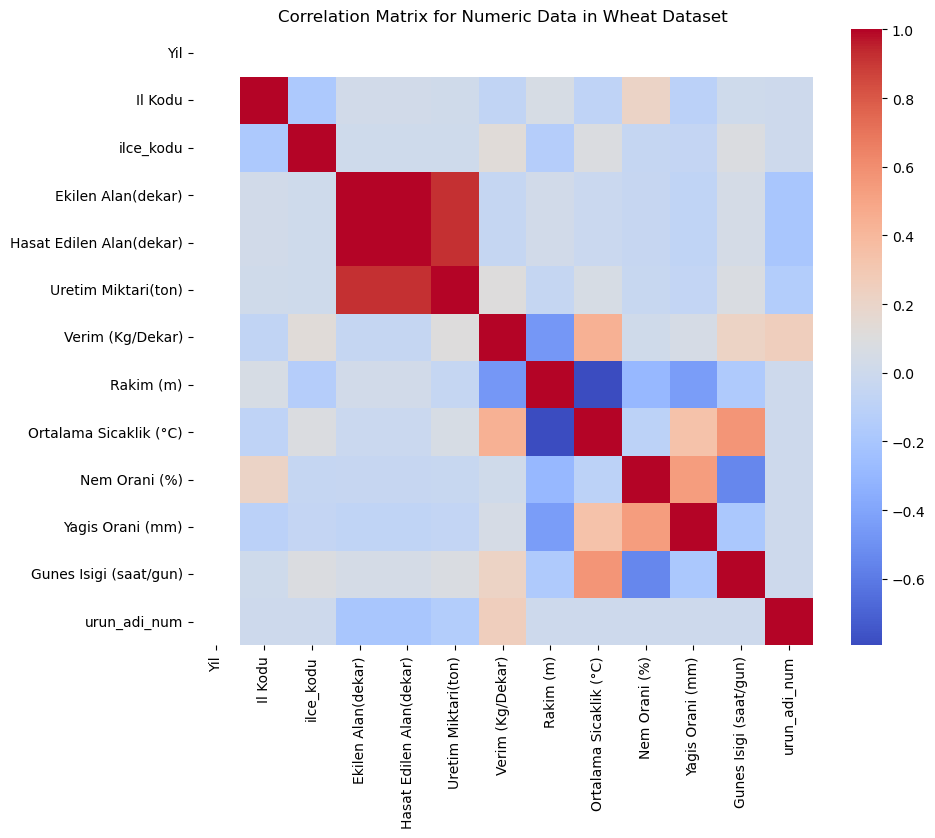

,Yil,Il Kodu,ilce_kodu,Ekilen Alan(dekar),Hasat Edilen Alan(dekar),Uretim Miktari(ton),Verim (Kg/Dekar),Rakim (m),Ortalama Sicaklik (°C),Nem Orani (%),Yagis Orani (mm),Gunes Isigi (saat/gun),urun_adi_num
Yil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Il Kodu,NaN,1.000000,-0.184141,0.021898,0.022370,0.015295,-0.066862,0.057937,-0.080437,0.213121,-0.101066,0.009628,0.000073
ilce_kodu,NaN,-0.184141,1.000000,0.009259,0.009611,0.005646,0.124611,-0.139725,0.087296,-0.045584,-0.053240,0.087187,-0.000065
Ekilen Alan(dekar),NaN,0.021898,0.009259,1.000000,0.999939,0.919324,-0.048578,0.019415,-0.019504,-0.042940,-0.077074,0.043777,-0.198642
Hasat Edilen Alan(dekar),NaN,0.022370,0.009611,0.999939,1.000000,0.919595,-0.048006,0.019032,-0.019330,-0.042719,-0.077734,0.043907,-0.198478
Uretim Miktari(ton),NaN,0.015295,0.005646,0.919324,0.919595,1.000000,0.105582,-0.050773,0.055470,-0.036345,-0.063672,0.077372,-0.143000
Verim (Kg/Dekar),NaN,-0.066862,0.124611,-0.048578,-0.048006,0.105582,1.000000,-0.465298,0.432773,0.018627,0.048282,0.217725,0.252697
Rakim (m),NaN,0.057937,-0.139725,0.019415,0.019032,-0.050773,-0.465298,1.000000,-0.794145,-0.295792,-0.439167,-0.165728,-0.000081
Ortalama Sicaklik (°C),NaN,-0.080437,0.087296,-0.019504,-0.019330,0.055470,0.432773,-0.794145,1.000000,-0.094970,0.337907,0.570019,0.000056
Nem Orani (%),NaN,0.213121,-0.045584,-0.042940,-0.042719,-0.036345,0.018627,-0.295792,-0.094970,1.000000,0.532572,-0.546883,0.000181


In [70]:
# Remove non-numeric columns for correlation analysis
numeric_data = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns only
correlation_matrix_numeric = numeric_data.corr()

# Plot the heatmap for the numeric data
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Data in Wheat Dataset')
plt.show()
correlation_matrix_numeric

In [76]:
df2 = df.drop(columns=['il', 'Yil','ilce_adi','Il Kodu','ilce_kodu','urun_adi','Ekilen Alan(dekar)','Hasat Edilen Alan(dekar)','Uretim Miktari(ton)'])

In [77]:
df2

,Verim (Kg/Dekar),Rakim (m),Ortalama Sicaklik (°C),Nem Orani (%),Yagis Orani (mm),Gunes Isigi (saat/gun),urun_adi_num
0,300,28,18.7,66,625.0,9.0,2
1,500,28,18.7,66,625.0,9.0,3
2,300,28,18.7,66,625.0,9.0,0
3,500,28,18.7,66,625.0,9.0,1
4,324,28,18.7,66,625.0,9.0,2
...,...,...,...,...,...,...,...
3408,250,120,14.1,75,960.0,5.7,0
3409,300,120,14.1,75,960.0,5.7,1
3410,270,200,13.6,76,1050.0,5.3,2
3411,300,200,13.6,76,1050.0,5.3,3


In [79]:
# Normalleştirme/Standartlaştırma için sayısal sütunları seçelim
numeric_columns = [
    'Verim (Kg/Dekar)','urun_adi_num', 'Rakim (m)', 'Ortalama Sicaklik (°C)',
    'Nem Orani (%)', 'Yagis Orani (mm)', 'Gunes Isigi (saat/gun)'
]

# Standartlaştırma işlemi
scaler = StandardScaler()
df2[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# İlk birkaç satırı görüntüleyelim
df2.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

,Verim (Kg/Dekar),Rakim (m),Ortalama Sicaklik (°C),Nem Orani (%),Yagis Orani (mm),Gunes Isigi (saat/gun),urun_adi_num
0,0.184742,-1.312567,1.710877,0.159402,0.033374,2.990683,0.446925
1,2.078807,-1.312567,1.710877,0.159402,0.033374,2.990683,1.341038
2,0.184742,-1.312567,1.710877,0.159402,0.033374,2.990683,-1.341300
3,2.078807,-1.312567,1.710877,0.159402,0.033374,2.990683,-0.447187
4,0.412030,-1.312567,1.710877,0.159402,0.033374,2.990683,0.446925


In [84]:
df2

,Verim (Kg/Dekar),Rakim (m),Ortalama Sicaklik (°C),Nem Orani (%),Yagis Orani (mm),Gunes Isigi (saat/gun),urun_adi_num
0,0.184742,-1.312567,1.710877,0.159402,0.033374,2.990683,0.446925
1,2.078807,-1.312567,1.710877,0.159402,0.033374,2.990683,1.341038
2,0.184742,-1.312567,1.710877,0.159402,0.033374,2.990683,-1.341300
3,2.078807,-1.312567,1.710877,0.159402,0.033374,2.990683,-0.447187
4,0.412030,-1.312567,1.710877,0.159402,0.033374,2.990683,0.446925
...,...,...,...,...,...,...,...
3408,-0.288774,-1.146259,0.232788,1.728248,1.892192,-1.494565,-1.341300
3409,0.184742,-1.146259,0.232788,1.728248,1.892192,-1.494565,-0.447187
3410,-0.099368,-1.001643,0.072126,1.902564,2.391577,-2.038231,0.446925
3411,0.184742,-1.001643,0.072126,1.902564,2.391577,-2.038231,1.341038


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Hedef değişkeni ve bağımsız değişkenleri belirleyelim
X = df2.drop(columns=['Verim (Kg/Dekar)'])
y = df2['Verim (Kg/Dekar)']

# Veri setini eğitim ve test seti olarak bölelim (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test setinin boyutlarını kontrol edelim
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((2730, 6), (683, 6), (2730,), (683,))

In [86]:
from sklearn.ensemble import RandomForestRegressor

# Modeli oluştur ve eğit
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yap
y_rf_pred = rf_model.predict(X_test)

# Model performansını değerlendirme
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print('mse',mse_rf)
print('r2',r2_rf)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

mse 0.23594623179579471
r2 0.7577600217386551


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [90]:
from sklearn.svm import SVR

# Support Vector Regressor modelini oluşturma ve eğitme
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yap
y_svr_pred = svr_model.predict(X_test)

# Model performansını değerlendirme
mse_svr = mean_squared_error(y_test, y_svr_pred)
r2_svr = r2_score(y_test, y_svr_pred)

print('mse',mse_rf)
print('r2',r2_rf)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

mse 0.23594623179579471
r2 0.7577600217386551


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modelini oluşturma ve eğitme
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yap
y_gbr_pred = gbr_model.predict(X_test)

# Model performansını değerlendirme
mse_gbr = mean_squared_error(y_test, y_gbr_pred)
r2_gbr = r2_score(y_test, y_gbr_pred)

print('mse',mse_gbr)
print('r2',r2_gbr)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

mse 0.2265761416032003
r2 0.7673800543506841


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [92]:
from sklearn.neighbors import KNeighborsRegressor

# K-Nearest Neighbors Regressor modelini oluşturma ve eğitme
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yap
y_knn_pred = knn_model.predict(X_test)

# Model performansını değerlendirme
mse_knn = mean_squared_error(y_test, y_knn_pred)
r2_knn = r2_score(y_test, y_knn_pred)

print('mse',mse_knn)
print('r2',r2_knn)

mse 0.240501282965372
r2 0.7530834668816456


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [93]:
from sklearn.ensemble import AdaBoostRegressor

# AdaBoost Regressor modelini oluşturma ve eğitme
ada_model = AdaBoostRegressor(random_state=42)
ada_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yap
y_ada_pred = ada_model.predict(X_test)

# Model performansını değerlendirme
mse_ada = mean_squared_error(y_test, y_ada_pred)
r2_ada = r2_score(y_test, y_ada_pred)

print('mse',mse_ada)
print('r2',r2_ada)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

mse 0.43126546466892035
r2 0.5572307470598475


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [95]:
# Performans metriklerini yazdırma
print('RandomForestRegressor MSE:', mse_rf, 'RandomForestRegressor R2:', r2_rf)
print('SVR MSE:', mse_svr, 'SVR R2:', r2_svr)
print('GradientBoostingRegressor MSE:', mse_gbr, 'GradientBoostingRegressor R2:', r2_gbr)
print('KNN MSE:', mse_knn, 'KNN R2:', r2_knn)
print('AdaBoostRegressor MSE:', mse_ada, 'AdaBoostRegressor R2:', r2_ada)

RandomForestRegressor MSE: 0.23594623179579471 RandomForestRegressor R2: 0.7577600217386551
SVR MSE: 0.3445255616241257 SVR R2: 0.646284393172524
GradientBoostingRegressor MSE: 0.2265761416032003 GradientBoostingRegressor R2: 0.7673800543506841
KNN MSE: 0.240501282965372 KNN R2: 0.7530834668816456
AdaBoostRegressor MSE: 0.43126546466892035 AdaBoostRegressor R2: 0.5572307470598475


In [113]:
from sklearn.model_selection import GridSearchCV

# Daha yönetilebilir bir hiperparametre ızgarası tanımlayalım
param_grid_small = {
    'n_estimators': [100, 200, 300, ],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, ],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


# GridSearchCV ile rastgele orman modelini optimize edelim
rf_grid_search_small = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                                    param_grid=param_grid_small,
                                    cv=3,
                                    n_jobs=-1,
                                    verbose=2)

# Modeli eğitelim
rf_grid_search_small.fit(X_train, y_train)

# En iyi hiperparametreleri gösterelim
best_params_small = rf_grid_search_small.best_params_
best_params_small


Fitting 3 folds for each of 486 candidates, totalling 1458 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [114]:
# En iyi hiperparametrelerle yeni bir model oluştur ve eğit
best_rf_model = RandomForestRegressor(random_state=42, **best_params_small)
best_rf_model.fit(X_train, y_train)

# Modelin performansını değerlendirelim
y_pred = best_rf_model.predict(X_test)
print(f"R2 skoru: {best_rf_model.score(X_test, y_test)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

R2 skoru: 0.7764485238218661
Mean Squared Error: 0.21774328413996125


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [110]:
# Gradient Boosting Regressor için hiperparametre ızgarasını tanımlayın
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# GridSearchCV ile Gradient Boosting Regressor modelini optimize edin
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Modeli eğitin
grid_search.fit(X_train, y_train)

# En iyi hiperparametreleri gösterin
best_params = grid_search.best_params_
print("En iyi hiperparametreler:", best_params)

# En iyi model ile tahminler yapın
best_gbr_model = grid_search.best_estimator_
y_pred_best_gbr = best_gbr_model.predict(X_test)

# Model performansını değerlendirin
mse_best_gbr = mean_squared_error(y_test, y_pred_best_gbr)
r2_best_gbr = r2_score(y_test, y_pred_best_gbr)

print('Gradient Boosting En İyi Model Mean Squared Error:', mse_best_gbr)
print('Gradient Boosting En İyi Model R-squared:', r2_best_gbr)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

En iyi hiperparametreler: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.9}
Gradient Boosting En İyi Model Mean Squared Error: 0.1286733585367168
Gradient Boosting En İyi Model R-squared: 0.8678943446669444


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

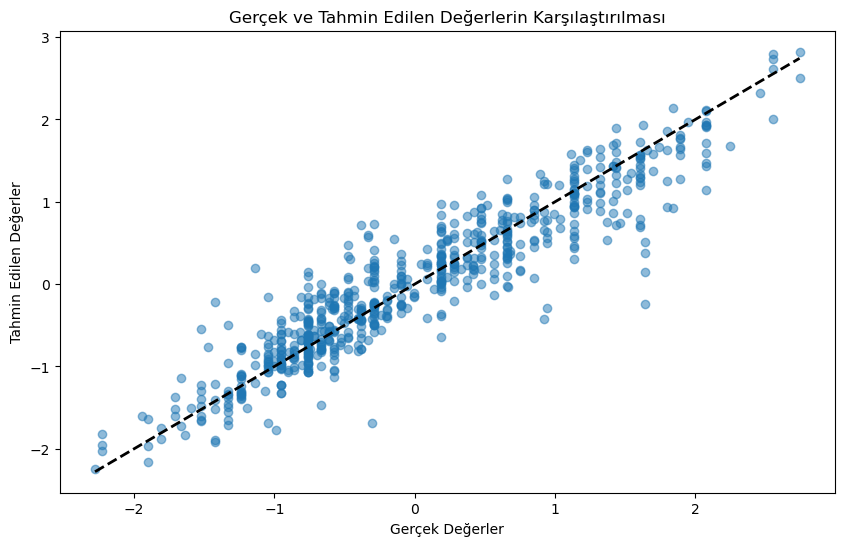

In [117]:
# Tahmin ve gerçek değerleri karşılaştıran bir grafik oluştur
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_gbr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


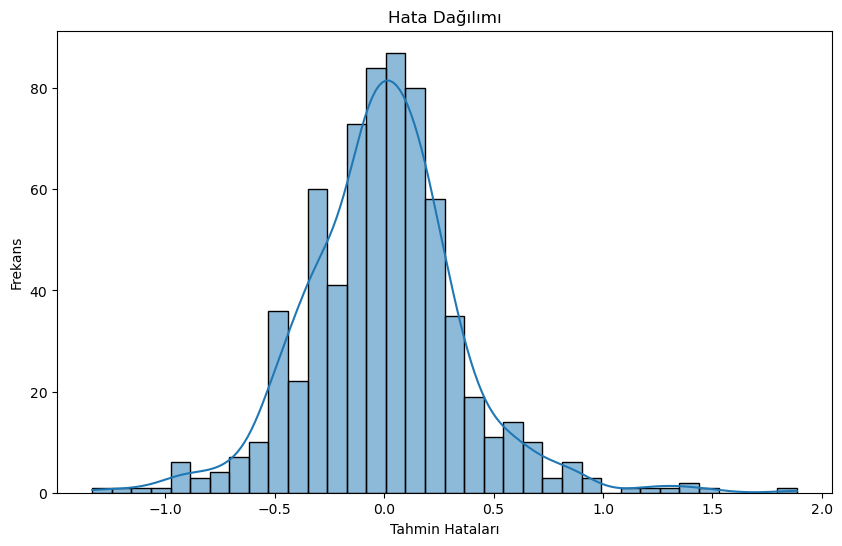

In [118]:
# Hata dağılımı grafiği
errors = y_test - y_pred_best_gbr

plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Tahmin Hataları')
plt.ylabel('Frekans')
plt.title('Hata Dağılımı')
plt.show()


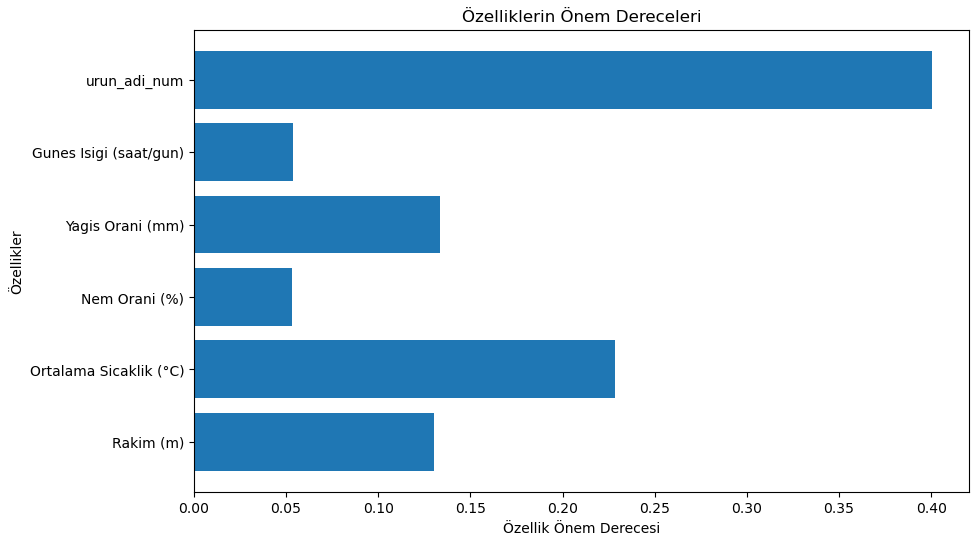

In [124]:
# Özelliklerin önem dereceleri grafiği
feature_importances = best_gbr_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Özellik Önem Derecesi')
plt.ylabel('Özellikler')
plt.title('Özelliklerin Önem Dereceleri')
plt.show()



In [125]:
df

,Yil,Il Kodu,il,ilce_kodu,ilce_adi,urun_adi,Ekilen Alan(dekar),Hasat Edilen Alan(dekar),Uretim Miktari(ton),Verim (Kg/Dekar),Rakim (m),Ortalama Sicaklik (°C),Nem Orani (%),Yagis Orani (mm),Gunes Isigi (saat/gun),urun_adi_num
0,2012,1,ADANA,1,SEYHAN,BUGDAY (DURUM) KURU,32723.335072,32688.793133,8735.332464,300,28,18.7,66,625.0,9.0,2
1,2012,1,ADANA,1,SEYHAN,BUGDAY (DURUM) SULU,32723.335072,32688.793133,8735.332464,500,28,18.7,66,625.0,9.0,3
2,2012,1,ADANA,1,SEYHAN,BUGDAY (DIGER) KURU,0.000000,0.000000,0.000000,300,28,18.7,66,625.0,9.0,0
3,2012,1,ADANA,1,SEYHAN,BUGDAY (DIGER) SULU,10000.000000,10000.000000,5000.000000,500,28,18.7,66,625.0,9.0,1
4,2012,1,ADANA,2,YUREGIR,BUGDAY (DURUM) KURU,32723.335072,32688.793133,8735.332464,324,28,18.7,66,625.0,9.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,2012,81,DUZCE,5,GUMUSOVA,BUGDAY (DIGER) KURU,1030.000000,1030.000000,258.000000,250,120,14.1,75,960.0,5.7,0
3409,2012,81,DUZCE,5,GUMUSOVA,BUGDAY (DIGER) SULU,32723.335072,32688.793133,8735.332464,300,120,14.1,75,960.0,5.7,1
3410,2012,81,DUZCE,6,KAYNASLI,BUGDAY (DURUM) KURU,32723.335072,32688.793133,8735.332464,270,200,13.6,76,1050.0,5.3,2
3411,2012,81,DUZCE,6,KAYNASLI,BUGDAY (DURUM) SULU,32723.335072,32688.793133,8735.332464,300,200,13.6,76,1050.0,5.3,3


In [133]:
from pyvis.network import Network


# Pyvis ile network oluşturma
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

# "Buğday" düğümünü ekleyelim
net.add_node('Buğday', label='Buğday', title='Buğday', color='red')

# Mevcut düğümleri takip etmek için bir set oluşturalım
added_nodes = set()
added_nodes.add('Buğday')

# İller ve ilçeler için düğümleri ekleyelim
for _, row in df.iterrows():
    il = row['il']
    ilce = row['ilce_adi']
    production = row['Üretim Miktari(ton)']
    
    # İller ile Buğday düğümünü bağlayalım
    if il not in added_nodes:
        net.add_node(il, label=il, title=il, color='blue')
        net.add_edge('Buğday', il, title=f"Production: {production} ton", value=production)
        added_nodes.add(il)
    
    # İlçeleri illere bağlayalım
    if ilce not in added_nodes:
        net.add_node(ilce, label=ilce, title=f"Temperature: {row['Ortalama Sıcaklık (°C)']} °C\nRainfall: {row['Yağış Oranı (mm)']} mm\nProduction: {production} ton", color='green')
        net.add_edge(il, ilce, title=f"Production: {production} ton", value=production)
        added_nodes.add(ilce)

# Graphı HTML dosyasına kaydetme ve gösterme
net.show('turkiye_bugday_uretimi.html')

